In [1]:
import numpy as np

In [2]:
class SVM:
    def __init__(self, learning_rate=0.01, regularization_param=0.01, num_iterations=1000):
        self.lr = learning_rate
        self.reg = regularization_param
        self.num_iter = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.num_iter):
            for i, x in enumerate(X):
                condition = y[i] * (np.dot(x, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.reg * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.reg * self.weights - np.dot(x, y[i]))
                    self.bias -= self.lr * y[i]
    
    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

In [3]:
X_train = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y_train = np.array([1, 1, 1, -1, -1])

svm = SVM()
svm.fit(X_train, y_train)

X_test = np.array([[1, 1], [2, 2], [3, 1]])
y_pred = svm.predict(X_test)
print(y_pred)

[-1.  1. -1.]


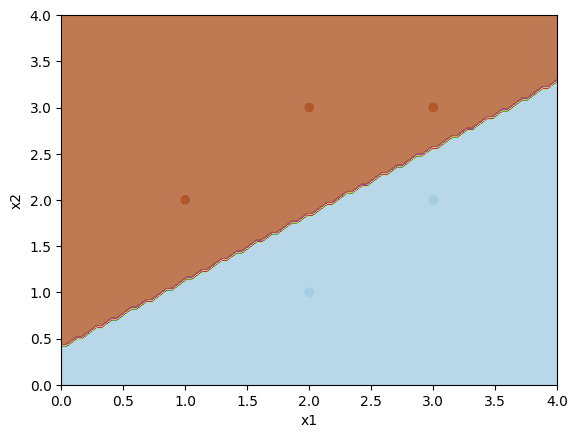

In [4]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(X_mesh)
Z = Z.reshape(xx.shape)

# Plot the training data and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()